## Convex Hull Demo

MIT License

Copyright (c) [2020] [Robo-Geek Inc Canada www.robo-geek.ca

For more information, look at OpenCV documentation:
https://docs.opencv.org/master/d3/dc0/group__imgproc__shape.html#ga014b28e56cb8854c0de4a211cb2be656


In [1]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt

GREEN = (0, 255, 0)
RED = (255, 0, 0)  ##RGB scale in matplotlib

In [2]:
def process_image(img):

    images = []
    titles = []
    width, height = img.shape[0], img.shape[1]

    # Convert to RGB scale to use matplotlib
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)
    titles.append("Original")

    # Convert to gray scale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    images.append(gray)
    titles.append("Gray Scale")

    # Apply blur 3x3
    blur = cv2.blur(gray, (5, 5))
    images.append(blur)
    titles.append("Blur 5x5")

    # Apply binary threshold
    ret, thresh = cv2.threshold(blur, 220, 255, cv2.THRESH_BINARY)
    images.append(thresh)
    titles.append("Binary Threshold")

    # Manage different versions of cv2
    try:
        image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    except:
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


    # Find convex hull for each contour
    hull = []
    for contour in contours:
        hull.append(cv2.convexHull(contour, False))

    # Create an empty canvas
    canvas = np.zeros((width, height, 3), np.uint8)

    # Draw contours
    result1 = canvas.copy()
    cv2.drawContours(result1, contours, -1, GREEN, 2, 8, hierarchy)
    images.append(result1)
    titles.append("Contours Detected")

    # Draw convex hull
    result2 = canvas.copy()
    cv2.drawContours(result2, hull, -1, RED, 2, 8, hierarchy)    
    images.append(result2)
    titles.append("Convex Hull")

    return images, titles

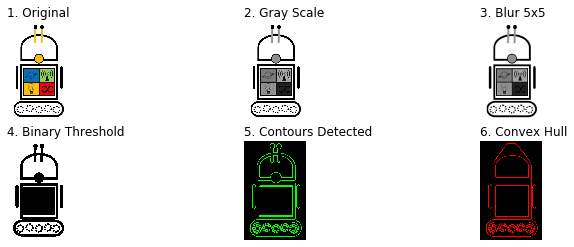

In [3]:
file_image = "ROBOGEEK STEM CLUB logo.jpg"

#Read image and process it
img = cv2.imread(file_image)
images, titles = process_image(img)

#Displaying images with plt
fig= plt.figure(figsize=(12,4))
fig.canvas.set_window_title("Convex-hull Demo")

for i, image in enumerate(images):
    plt.subplot(2, 3, i+1), plt.imshow(image,'gray')
    plt.title(str(i+1) + ". " + titles[i], None , 'left')
    plt.axis("off")
        
plt.show()

### MIT License
Copyright (c) [2020] [Robo-Geek Inc Canada www.robo-geek.ca]
Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE